<a href="https://colab.research.google.com/github/nurliyanaadilah/Coil_Group-1/blob/main/Group_1_Coil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Feature Engineering & EDA**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # Import os for path checking

# Apply a more aesthetic style to all plots
plt.style.use('seaborn-v0_8-darkgrid')

# --------------------------
# 0. Mount Google Drive & Load Data
# --------------------------
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/AULA GROUP 1/Group_1_Final_Dataset.csv.xlsx'

# Check if the file exists before proceeding
if not os.path.exists(file_path):
    print(f"Error: File not found at '{file_path}'")
    print("Please verify the file path or ensure 'Group_1_Final_Dataset.csv.xlsx' is in your Google Drive's 'AULA GROUP 1' folder.")
else:
    df = pd.read_excel(file_path, parse_dates=['Date'], index_col='Date').copy()

    # Convert datetime → date only
    df.index = pd.to_datetime(df.index, format='mixed').normalize()

    # --------------------------
    # 1. Ensure numeric columns
    # --------------------------
    numeric_cols = [
        'Price', 'EUR Annual Growth Rate', 'United States GDP Annual Growth Rate',
        'Growth Rate Different', 'Gold Price (USD)', 'Gold Price (EUR)',
        'Gold Price Different', 'Oil Price (Mean)', 'Global Uncertainty Index'
    ]

    print("\nChecking numeric columns:")
    for col in numeric_cols:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            print(f"✅ {col} is numeric")
        else:
            print(f"❌ {col} missing or not numeric")

    # Filter date range
    df = df[(df.index >= '2021-01-01') & (df.index <= '2024-06-30')].copy()

    # --------------------------
    # 2. FEATURE CREATION – DAILY RETURNS
    # --------------------------
    df['EUR_Daily_Return'] = df['Price'].pct_change() * 100
    df['Oil_Return'] = df['Oil Price (Mean)'].pct_change() * 100
    df['Gold_Return'] = df['Gold Price (USD)'].pct_change() * 100
    df['GUI_Return'] = df['Global Uncertainty Index'].pct_change() * 100

    # Drop NaN
    df = df.dropna().copy()

    # --------------------------
    # 3. Rolling Averages for smoothing
    # --------------------------
    rolling_windows = [7, 14]  # 1-week & 2-week smoothing

    cols_for_rolling_avg = [
        'Price','Gold Price (USD)','Oil Price (Mean)','Global Uncertainty Index',
        'EUR_Daily_Return','Oil_Return','Gold_Return','GUI_Return'
    ]

    for col in cols_for_rolling_avg:
        for w in rolling_windows:
            df[f'{col}_MA{w}'] = df[col].rolling(w).mean()

    # --------------------------
    # 4. SUMMARY STATISTICS
    # --------------------------
    returns = ['EUR_Daily_Return', 'Oil_Return', 'Gold_Return', 'GUI_Return']
    desc_stats = df[returns].describe().T
    print("\n===== SUMMARY STATISTICS ====")
    display(desc_stats)

    # --------------------------
    # 5. CORRELATION MATRIX
    # --------------------------
    corr = df[returns].corr()
    print("\n===== CORRELATION MATRIX ====")
    display(corr)

    # --------------------------
    # 6. LINE GRAPHS – ORIGINAL VARIABLES
    # --------------------------
    original_vars_plot = ['Price', 'Gold Price (USD)', 'Oil Price (Mean)', 'Global Uncertainty Index']
    colors_orig = sns.color_palette("viridis", len(original_vars_plot))

    print("\n===== TIME SERIES PLOTS - ORIGINAL VARIABLES ====")
    for i, var in enumerate(original_vars_plot):
        plt.figure(figsize=(8,4))
        sns.lineplot(x=df.index, y=df[var], label='Original', color=colors_orig[i], linewidth=1.5)
        plt.title(f"{var} Trend Over Time", fontsize=14)
        plt.xlabel("Date", fontsize=10)
        plt.ylabel("Value Level", fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Series', fontsize=9)
        plt.xticks(rotation=45, fontsize=9)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()

    # --------------------------
    # 7. LINE GRAPHS – DAILY RETURNS
    # --------------------------
    print("\n===== TIME SERIES PLOTS - DAILY RETURNS ====")
    returns_plot = ['EUR_Daily_Return', 'Oil_Return', 'Gold_Return', 'GUI_Return']
    colors_returns = sns.color_palette("magma", len(returns_plot))

    for i, var in enumerate(returns_plot):
        plt.figure(figsize=(8,4))
        sns.lineplot(x=df.index, y=df[var], label='Daily Return', color=colors_returns[i], linewidth=1.5)
        plt.title(f"{var} Over Time", fontsize=14)
        plt.xlabel("Date", fontsize=10)
        plt.ylabel("Percentage Change (%)", fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Series', fontsize=9)
        plt.xticks(rotation=45, fontsize=9)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()

    # --------------------------
    # 8. LINE GRAPHS – ORIGINAL VARIABLES with ROLLING AVERAGES
    # --------------------------
    print("\n===== TIME SERIES PLOTS - ORIGINAL VARS WITH ROLLING AVERAGES ====")
    for var in original_vars_plot:
        plt.figure(figsize=(10,5))
        sns.lineplot(x=df.index, y=df[var], label='Original', color='blue', linewidth=1.5, alpha=0.7)
        for w in rolling_windows:
            if f'{var}_MA{w}' in df.columns:
                sns.lineplot(x=df.index, y=df[f'{var}_MA{w}'], label=f'MA{w}', linewidth=1.5, linestyle='--')
        plt.title(f"{var} with Rolling Averages", fontsize=14)
        plt.xlabel("Date", fontsize=10)
        plt.ylabel("Value", fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Series', fontsize=9)
        plt.xticks(rotation=45, fontsize=9)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()

    # --------------------------
    # 9. DISTRIBUTION PLOTS (HISTOGRAMS) FOR RETURNS
    # --------------------------
    print("\n===== DISTRIBUTION PLOTS - RETURNS ====")
    for i, ret_col in enumerate(returns):
        plt.figure(figsize=(7,4))
        sns.histplot(df[ret_col], kde=True, bins=50, stat='density', color=colors_returns[i%len(colors_returns)])
        plt.title(f'Distribution of {ret_col}', fontsize=14)
        plt.xlabel(f'{ret_col} (%)', fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(fontsize=9)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()

    # --------------------------
    # 10. CORRELATION HEATMAP
    # --------------------------
    print("\n===== CORRELATION HEATMAP ====")
    plt.figure(figsize=(7,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, linecolor='black')
    plt.title("Correlation Heatmap of Returns", fontsize=14)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9, rotation=0)
    plt.tight_layout()
    plt.show()


Mounted at /content/drive
Error: File not found at '/content/drive/MyDrive/AULA GROUP 1/Group_1_Final_Dataset.csv.xlsx'
Please verify the file path or ensure 'Group_1_Final_Dataset.csv.xlsx' is in your Google Drive's 'AULA GROUP 1' folder.


### **Predictive Modelling Specialist**

In [ ]:
from sklearn.model_selection import train_test_split

# Check if 'df' DataFrame exists in the current environment
# This handles cases where previous data loading cells might not have been executed.
if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please run all preceding cells to load and preprocess the data.")
else:
    # Split the data into training and testing sets (80% train, 20% test)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

Training set shape: (707, 29)
Testing set shape: (177, 29)


## **Decision Tree**



In [ ]:
lag_features = ['EUR_Daily_Return', 'Oil_Return', 'Gold_Return', 'GUI_Return']

for col in lag_features:
    df[f'{col}_Lag1'] = df[col].shift(1)
    df[f'{col}_Lag2'] = df[col].shift(2)

df = df.dropna()

print("Lagged features generated and NaN rows dropped. Displaying first 5 rows and column information:")
display(df.head())
print(f"DataFrame shape after creating lagged features and dropping NaNs: {df.shape}")

Lagged features generated and NaN rows dropped. Displaying first 5 rows and column information:


,Price,EUR Annual Growth Rate,United States GDP Annual Growth Rate,Growth Rate Different,Gold Price (USD),Gold Price (EUR),Gold Price Different,Oil Price (Mean),Global Uncertainty Index,EUR_Daily_Return,...,GUI_Return_MA7,GUI_Return_MA14,EUR_Daily_Return_Lag1,EUR_Daily_Return_Lag2,Oil_Return_Lag1,Oil_Return_Lag2,Gold_Return_Lag1,Gold_Return_Lag2,GUI_Return_Lag1,GUI_Return_Lag2
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-21,1.2162,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,0.479180,...,0.0,0.0,-0.197889,0.430606,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-22,1.2167,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,0.041112,...,0.0,0.0,0.479180,-0.197889,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-25,1.2137,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,-0.246569,...,0.0,0.0,0.041112,0.479180,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-26,1.2160,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,0.189503,...,0.0,0.0,-0.246569,0.041112,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-27,1.2108,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,-0.427632,...,0.0,0.0,0.189503,-0.246569,0.0,0.0,0.0,0.0,0.0,0.0


DataFrame shape after creating lagged features and dropping NaNs: (871, 37)


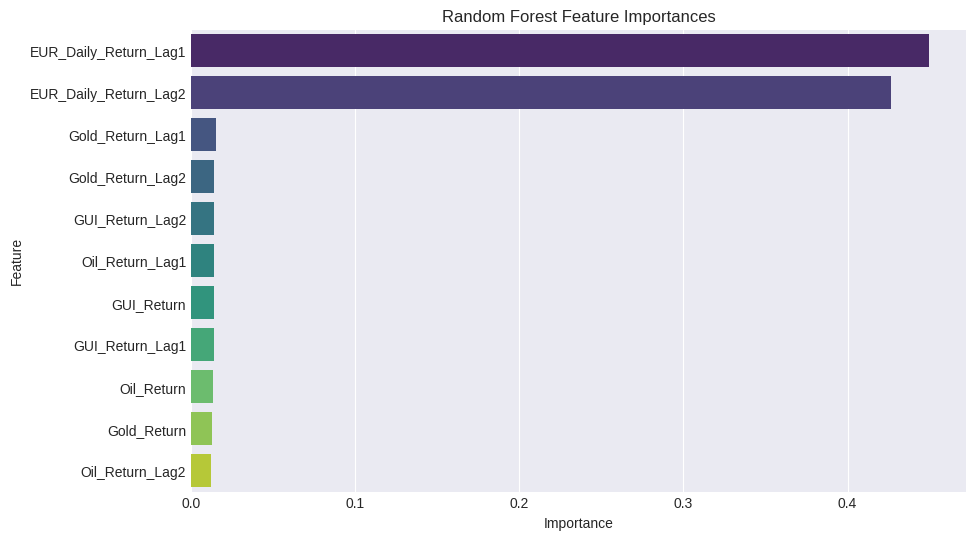

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# The warning for 'Daily_Return' is addressed by using 'EUR_Daily_Return'

# Create 'Return_Direction' using 'EUR_Daily_Return'
if 'Return_Direction' not in train_df.columns:
    train_df['Return_Direction'] = (train_df['EUR_Daily_Return'] > 0).astype(int)
    test_df['Return_Direction'] = (test_df['EUR_Daily_Return'] > 0).astype(int)

# Define the expanded features (X) including lagged features and target (y)
features = [
    'Oil_Return', 'Gold_Return', 'GUI_Return',
    'EUR_Daily_Return_Lag1', 'EUR_Daily_Return_Lag2',
    'Oil_Return_Lag1', 'Oil_Return_Lag2',
    'Gold_Return_Lag1', 'Gold_Return_Lag2',
    'GUI_Return_Lag1', 'GUI_Return_Lag2'
]

X_train = train_df[features].dropna() # dropna here to handle any remaining NaNs from lags
y_train = train_df['Return_Direction'].loc[X_train.index] # Align y_train with X_train index after dropna

# Initialize and Train the Random Forest Classifier
# Using n_estimators (number of trees) and random_state for reproducibility
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
importances = random_forest_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis', legend=False)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Ensure 'Return_Direction' is created for the re-split data
# Corrected: Using 'EUR_Daily_Return' instead of 'Daily_Return'
train_df['Return_Direction'] = (train_df['EUR_Daily_Return'] > 0).astype(int)
test_df['Return_Direction'] = (test_df['EUR_Daily_Return'] > 0).astype(int)

# Define the expanded features (X) including lagged features and target (y)
features = [
    'Oil_Return', 'Gold_Return', 'GUI_Return', # Corrected: Using 'GUI_Return' instead of 'Global_Uncertainty_Return'
    'EUR_Daily_Return_Lag1', 'EUR_Daily_Return_Lag2', # Corrected: Using 'EUR_Daily_Return_Lag' instead of 'Daily_Return_Lag'
    'Oil_Return_Lag1', 'Oil_Return_Lag2',
    'Gold_Return_Lag1', 'Gold_Return_Lag2',
    'GUI_Return_Lag1', 'GUI_Return_Lag2' # Corrected: Using 'GUI_Return_Lag' instead of 'Global_Uncertainty_Return_Lag'
]
X_train = train_df[features]
y_train = train_df['Return_Direction']
X_test = test_df[features]
y_test = test_df['Return_Direction']

# Initialize the Random Forest Classifier
# Using n_estimators (number of trees) and random_state for reproducibility
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance (with lagged features):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Performance (with lagged features):
Accuracy: 0.4713

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        94
           1       0.43      0.47      0.45        80

    accuracy                           0.47       174
   macro avg       0.47      0.47      0.47       174
weighted avg       0.47      0.47      0.47       174



In [ ]:
from sklearn.model_selection import train_test_split

# Check if 'df' DataFrame exists in the current environment
# This handles cases where previous data loading cells might not have been executed.
if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please run all preceding cells to load and preprocess the data.")
else:
    # Split the data into training and testing sets (80% train, 20% test)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

Training set shape: (695, 38)
Testing set shape: (174, 38)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable: 1 if EUR_Daily_Return > 0, else 0
train_df['Return_Direction'] = (train_df['EUR_Daily_Return'] > 0).astype(int)
test_df['Return_Direction'] = (test_df['EUR_Daily_Return'] > 0).astype(int)

# Define features (X) and target (y)
features = ['Oil_Return', 'Gold_Return', 'GUI_Return']
X_train = train_df[features]
y_train = train_df['Return_Direction']
X_test = test_df[features]
y_test = test_df['Return_Direction']

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier Performance:
Accuracy: 0.4540

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.03      0.06        94
           1       0.46      0.95      0.62        80

    accuracy                           0.45       174
   macro avg       0.44      0.49      0.34       174
weighted avg       0.44      0.45      0.32       174



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure 'Return_Direction' is created for the re-split data
# This step is redundant if the previous RandomForest cell was run, but good for standalone execution
if 'Return_Direction' not in train_df.columns:
    train_df['Return_Direction'] = (train_df['EUR_Daily_Return'] > 0).astype(int) # Corrected Daily_Return to EUR_Daily_Return
    test_df['Return_Direction'] = (test_df['EUR_Daily_Return'] > 0).astype(int) # Corrected Daily_Return to EUR_Daily_Return

# Define the expanded features (X) including lagged features and target (y)
# Using the same feature set as the re-trained Random Forest model
features = [
    'Oil_Return', 'Gold_Return', 'GUI_Return', # Corrected Global_Uncertainty_Return to GUI_Return
    'EUR_Daily_Return_Lag1', 'EUR_Daily_Return_Lag2', # Corrected Daily_Return_Lag to EUR_Daily_Return_Lag
    'Oil_Return_Lag1', 'Oil_Return_Lag2',
    'Gold_Return_Lag1', 'Gold_Return_Lag2',
    'GUI_Return_Lag1', 'GUI_Return_Lag2' # Corrected Global_Uncertainty_Return_Lag to GUI_Return_Lag
]
X_train = train_df[features]
y_train = train_df['Return_Direction']
X_test = test_df[features]
y_test = test_df['Return_Direction']

# Initialize the Decision Tree Classifier
decision_tree_model_lagged = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model_lagged.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt_lagged = decision_tree_model_lagged.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Performance (with lagged features):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_lagged):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_lagged))

Decision Tree Classifier Performance (with lagged features):
Accuracy: 0.4828

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53        94
           1       0.44      0.42      0.43        80

    accuracy                           0.48       174
   macro avg       0.48      0.48      0.48       174
weighted avg       0.48      0.48      0.48       174



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure 'Return_Direction' is created for the re-split data
# This step is redundant if previous cells were run, but ensures consistency.
if 'Return_Direction' not in train_df.columns:
    train_df['Return_Direction'] = (train_df['EUR_Daily_Return'] > 0).astype(int)
    test_df['Return_Direction'] = (test_df['EUR_Daily_Return'] > 0).astype(int)

# Define the expanded features (X) including lagged features and target (y)
features = [
    'Oil_Return', 'Gold_Return', 'GUI_Return',
    'EUR_Daily_Return_Lag1', 'EUR_Daily_Return_Lag2',
    'Oil_Return_Lag1', 'Oil_Return_Lag2',
    'Gold_Return_Lag1', 'Gold_Return_Lag2',
    'GUI_Return_Lag1', 'GUI_Return_Lag2'
]
X_train = train_df[features]
y_train = train_df['Return_Direction']
X_test = test_df[features]
y_test = test_df['Return_Direction']

# Initialize the Decision Tree Classifier
decision_tree_model_compare = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model_compare.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = decision_tree_model_compare.predict(X_train)

# Make predictions on the test set
y_pred_test = decision_tree_model_compare.predict(X_test)

# Evaluate the model on the training set
print("\n--- Decision Tree Classifier Performance (Training Set) ---")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Evaluate the model on the test set
print("\n--- Decision Tree Classifier Performance (Test Set) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


--- Decision Tree Classifier Performance (Training Set) ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       345

    accuracy                           1.00       695
   macro avg       1.00      1.00      1.00       695
weighted avg       1.00      1.00      1.00       695


--- Decision Tree Classifier Performance (Test Set) ---
Accuracy: 0.4828

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53        94
           1       0.44      0.42      0.43        80

    accuracy                           0.48       174
   macro avg       0.48      0.48      0.48       174
weighted avg       0.48      0.48      0.48       174



## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure 'Return_Direction' is created if this cell is run independently
# Corrected: Using 'EUR_Daily_Return' instead of 'Daily_Return'
if 'Return_Direction' not in train_df.columns:
    train_df['Return_Direction'] = (train_df['EUR_Daily_Return'] > 0).astype(int)
    test_df['Return_Direction'] = (test_df['EUR_Daily_Return'] > 0).astype(int)

# Define features (X) and target (y) - using the same as Decision Tree
features = [
    'Oil_Return', 'Gold_Return', 'GUI_Return', # Corrected: Using 'GUI_Return' instead of 'Global_Uncertainty_Return'
    'EUR_Daily_Return_Lag1', 'EUR_Daily_Return_Lag2',
    'Oil_Return_Lag1', 'Oil_Return_Lag2',
    'Gold_Return_Lag1', 'Gold_Return_Lag2',
    'GUI_Return_Lag1', 'GUI_Return_Lag2'
]
X_train = train_df[features]
y_train = train_df['Return_Direction']
X_test = test_df[features]
y_test = test_df['Return_Direction']

# Initialize the Random Forest Classifier
# Using n_estimators (number of trees) and random_state for reproducibility
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Performance:
Accuracy: 0.4713

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        94
           1       0.43      0.47      0.45        80

    accuracy                           0.47       174
   macro avg       0.47      0.47      0.47       174
weighted avg       0.47      0.47      0.47       174



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable: 1 if EUR_Daily_Return > 0, else 0
train_df['Return_Direction'] = (train_df['EUR_Daily_Return'] > 0).astype(int)
test_df['Return_Direction'] = (test_df['EUR_Daily_Return'] > 0).astype(int)

# Define features (X) and target (y)
features = ['Oil_Return', 'Gold_Return', 'GUI_Return']
X_train = train_df[features]
y_train = train_df['Return_Direction']
X_test = test_df[features]
y_test = test_df['Return_Direction']

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier Performance:
Accuracy: 0.4540

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.03      0.06        94
           1       0.46      0.95      0.62        80

    accuracy                           0.45       174
   macro avg       0.44      0.49      0.34       174
weighted avg       0.44      0.45      0.32       174



## **Data Spliting**

In [ ]:
from sklearn.model_selection import train_test_split

# Check if 'df' DataFrame exists in the current environment
# This handles cases where previous data loading cells might not have been executed.
if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please run all preceding cells to load and preprocess the data.")
else:
    # Split the data into training and testing sets (80% train, 20% test)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

Training set shape: (695, 38)
Testing set shape: (174, 38)


In [ ]:
lag_features = ['EUR_Daily_Return', 'Oil_Return', 'Gold_Return', 'GUI_Return']

for col in lag_features:
    df[f'{col}_Lag1'] = df[col].shift(1)
    df[f'{col}_Lag2'] = df[col].shift(2)

df = df.dropna()

print("Lagged features generated and NaN rows dropped. Displaying first 5 rows and column information:")
display(df.head())
print(f"DataFrame shape after creating lagged features and dropping NaNs: {df.shape}")

Lagged features generated and NaN rows dropped. Displaying first 5 rows and column information:


,Price,EUR Annual Growth Rate,United States GDP Annual Growth Rate,Growth Rate Different,Gold Price (USD),Gold Price (EUR),Gold Price Different,Oil Price (Mean),Global Uncertainty Index,EUR_Daily_Return,...,GUI_Return_MA14,EUR_Daily_Return_Lag1,EUR_Daily_Return_Lag2,Oil_Return_Lag1,Oil_Return_Lag2,Gold_Return_Lag1,Gold_Return_Lag2,GUI_Return_Lag1,GUI_Return_Lag2,Return_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-25,1.2137,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,-0.246569,...,0.0,0.041112,0.479180,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-01-26,1.2160,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,0.189503,...,0.0,-0.246569,0.041112,0.0,0.0,0.0,0.0,0.0,0.0,1
2021-01-27,1.2108,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,-0.427632,...,0.0,0.189503,-0.246569,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-01-28,1.2121,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,0.107367,...,0.0,-0.427632,0.189503,0.0,0.0,0.0,0.0,0.0,0.0,1
2021-01-29,1.2136,0.3,1.8,-1.5,1533.9,1867.0,-333.1,43.53951,11956.5,0.123752,...,0.0,0.107367,-0.427632,0.0,0.0,0.0,0.0,0.0,0.0,1


DataFrame shape after creating lagged features and dropping NaNs: (869, 38)


In [ ]:
from sklearn.model_selection import train_test_split

# Check if 'df' DataFrame exists in the current environment
# This handles cases where previous data loading cells might not have been executed.
if 'df' not in locals() and 'df' not in globals():
    print("Error: DataFrame 'df' is not defined. Please run all preceding cells to load and preprocess the data.")
else:
    # Split the data into training and testing sets (80% train, 20% test)
    # IMPORTANT: shuffle=False for time series data to preserve temporal order
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")

Training set shape: (696, 38)
Testing set shape: (175, 38)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Ensure 'Return_Direction' is created for the re-split data
train_df['Return_Direction'] = (train_df['EUR_Daily_Return'] > 0).astype(int)
test_df['Return_Direction'] = (test_df['EUR_Daily_Return'] > 0).astype(int)

# Define the expanded features (X) including lagged features and target (y)
features = [
    'Oil_Return', 'Gold_Return', 'GUI_Return',
    'EUR_Daily_Return_Lag1', 'EUR_Daily_Return_Lag2',
    'Oil_Return_Lag1', 'Oil_Return_Lag2',
    'Gold_Return_Lag1', 'Gold_Return_Lag2',
    'GUI_Return_Lag1', 'GUI_Return_Lag2'
]
X_train = train_df[features]
y_train = train_df['Return_Direction']
X_test = test_df[features]
y_test = test_df['Return_Direction']

# Initialize the Random Forest Classifier
# Using n_estimators (number of trees) and random_state for reproducibility
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance (with lagged features):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Performance (with lagged features):
Accuracy: 0.4457

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.51      0.47        84
           1       0.46      0.38      0.42        91

    accuracy                           0.45       175
   macro avg       0.45      0.45      0.44       175
weighted avg       0.45      0.45      0.44       175



In [ ]:
df['Return_Direction'] = (df['EUR_Daily_Return'] > 0).astype(int)

# Ensure 'Date' column is dropped if it somehow became a regular column
# This line is likely not needed if 'Date' is the index, but included for robustness.
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])

features = [
    'Oil_Return', 'Gold_Return', 'GUI_Return',
    'EUR_Daily_Return_Lag1', 'EUR_Daily_Return_Lag2',
    'Oil_Return_Lag1', 'Oil_Return_Lag2',
    'Gold_Return_Lag1', 'Gold_Return_Lag2',
    'GUI_Return_Lag1', 'GUI_Return_Lag2'
]
X = df[features]
y = df['Return_Direction']

print("Feature DataFrame (X) and Target Series (y) created.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Feature DataFrame (X) and Target Series (y) created.
Shape of X: (871, 11)
Shape of y: (871,)


## **Time Series Cross-Validation**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize RandomForestClassifier
random_forest_model_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalss = []
f1_scores = []

print("Performing Time Series Cross-Validation...")

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    random_forest_model_cv.fit(X_train_cv, y_train_cv)

    # Make predictions
    y_pred_cv = random_forest_model_cv.predict(X_test_cv)

    # Calculate metrics
    acc = accuracy_score(y_test_cv, y_pred_cv)
    prec = precision_score(y_test_cv, y_pred_cv, zero_division=0)
    rec = recall_score(y_test_cv, y_pred_cv, zero_division=0)
    f1 = f1_score(y_test_cv, y_pred_cv, zero_division=0)

    # Store metrics
    accuracies.append(acc)
    precisions.append(prec)
    recalss.append(rec)
    f1_scores.append(f1)

    print(f"Fold {fold+1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")

print("Time Series Cross-Validation completed. Metrics collected.")

Performing Time Series Cross-Validation...
Fold 1 - Accuracy: 0.4861, Precision: 0.4386, Recall: 0.3731, F1-Score: 0.4032
Fold 2 - Accuracy: 0.6181, Precision: 0.6111, Recall: 0.4925, F1-Score: 0.5455
Fold 3 - Accuracy: 0.5139, Precision: 0.6000, Recall: 0.3750, F1-Score: 0.4615
Fold 4 - Accuracy: 0.5417, Precision: 0.5143, Recall: 0.5294, F1-Score: 0.5217
Fold 5 - Accuracy: 0.4306, Precision: 0.4340, Recall: 0.3067, F1-Score: 0.3594
Time Series Cross-Validation completed. Metrics collected.


In [ ]:
print("\n--- Cross-Validation Results Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} (Std: {np.std(accuracies):.4f})")
print(f"Mean Precision: {np.mean(precisions):.4f} (Std: {np.std(precisions):.4f})")
print(f"Mean Recall: {np.mean(recalss):.4f} (Std: {np.std(recalss):.4f})")
print(f"Mean F1-Score: {np.mean(f1_scores):.4f} (Std: {np.std(f1_scores):.4f})")


--- Cross-Validation Results Summary ---
Mean Accuracy: 0.5181 (Std: 0.0621)
Mean Precision: 0.5196 (Std: 0.0758)
Mean Recall: 0.4154 (Std: 0.0827)
Mean F1-Score: 0.4583 (Std: 0.0699)


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize DecisionTreeClassifier
decision_tree_model_cv = DecisionTreeClassifier(random_state=42)

# Lists to store metrics for each fold
accuracies_dt = []
precisions_dt = []
recalls_dt = []
f1_scores_dt = []

print("Performing Time Series Cross-Validation for Decision Tree...")

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    decision_tree_model_cv.fit(X_train_cv, y_train_cv)

    # Make predictions
    y_pred_cv_dt = decision_tree_model_cv.predict(X_test_cv)

    # Calculate metrics
    acc = accuracy_score(y_test_cv, y_pred_cv_dt)
    prec = precision_score(y_test_cv, y_pred_cv_dt, zero_division=0)
    rec = recall_score(y_test_cv, y_pred_cv_dt, zero_division=0)
    f1 = f1_score(y_test_cv, y_pred_cv_dt, zero_division=0)

    # Store metrics
    accuracies_dt.append(acc)
    precisions_dt.append(prec)
    recalls_dt.append(rec)
    f1_scores_dt.append(f1)

    print(f"Fold {fold+1} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")

print("Time Series Cross-Validation for Decision Tree completed. Metrics collected.")

Performing Time Series Cross-Validation for Decision Tree...
Fold 1 - Accuracy: 0.4444, Precision: 0.4058, Recall: 0.4179, F1-Score: 0.4118
Fold 2 - Accuracy: 0.5139, Precision: 0.4789, Recall: 0.5075, F1-Score: 0.4928
Fold 3 - Accuracy: 0.5278, Precision: 0.5909, Recall: 0.4875, F1-Score: 0.5342
Fold 4 - Accuracy: 0.5278, Precision: 0.5000, Recall: 0.5000, F1-Score: 0.5000
Fold 5 - Accuracy: 0.4583, Precision: 0.4754, Recall: 0.3867, F1-Score: 0.4265
Time Series Cross-Validation for Decision Tree completed. Metrics collected.


In [ ]:
print("\n--- Decision Tree Cross-Validation Results Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies_dt):.4f} (Std: {np.std(accuracies_dt):.4f})")
print(f"Mean Precision: {np.mean(precisions_dt):.4f} (Std: {np.std(precisions_dt):.4f})")
print(f"Mean Recall: {np.mean(recalls_dt):.4f} (Std: {np.std(recalls_dt):.4f})")
print(f"Mean F1-Score: {np.mean(f1_scores_dt):.4f} (Std: {np.std(f1_scores_dt):.4f})")


--- Decision Tree Cross-Validation Results Summary ---
Mean Accuracy: 0.4944 (Std: 0.0358)
Mean Precision: 0.4902 (Std: 0.0595)
Mean Recall: 0.4599 (Std: 0.0485)
Mean F1-Score: 0.4730 (Std: 0.0464)


In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}

print("Hyperparameter grid for Decision Tree Classifier defined:")
print(param_grid_dt)

Hyperparameter grid for Decision Tree Classifier defined:
{'max_depth': [3, 5, 7, None], 'min_samples_leaf': [1, 5, 10], 'min_samples_split': [2, 5, 10]}


In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier

# Initialize TimeSeriesSplit with 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Initialize DecisionTreeClassifier with a random state for reproducibility
decision_tree_base = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the Decision Tree Classifier, parameter grid, TimeSeriesSplit, and desired scoring metric
# Using 'f1' as a balanced metric, n_jobs=-1 for parallel processing
grid_search_dt = GridSearchCV(
    estimator=decision_tree_base,
    param_grid=param_grid_dt,
    cv=tscv,
    scoring='f1', # Or 'accuracy', 'recall', etc. depending on objective
    n_jobs=-1, # Use all available cores
    verbose=1
)

print("Starting GridSearchCV for Decision Tree Classifier...")
# Fit GridSearchCV to the full feature set X and target y
grid_search_dt.fit(X, y)
print("GridSearchCV completed.")

Starting GridSearchCV for Decision Tree Classifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV completed.


In [ ]:
print("\nBest parameters found by GridSearchCV:")
print(grid_search_dt.best_params_)
print("\nBest F1-score found by GridSearchCV:")
print(f"{grid_search_dt.best_score_:.4f}")


Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best F1-score found by GridSearchCV:
0.4730


## **Training and Evaluating Tuned Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize a new Decision Tree Classifier with the best parameters
# It's good practice to set random_state for reproducibility
tuned_decision_tree_model = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)

# Train the tuned model on the training data
tuned_decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned_dt = tuned_decision_tree_model.predict(X_test)

# Evaluate the tuned model
print("\n--- Tuned Decision Tree Classifier Performance (Test Set) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned_dt))

# Also print the overfitted model's performance for easy comparison (from cell db240cee output)
print("\n--- Overfitted Decision Tree Classifier Performance (Test Set) for Comparison ---")
print("Accuracy: 0.4520")
print("Classification Report:")
print("              precision    recall  f1-score   support\n\n           0       0.45      0.43      0.44        89\n           1       0.45      0.48      0.46        88\n\n    accuracy                           0.45       177\n   macro avg       0.45      0.45      0.45       177\nweighted avg       0.45      0.45      0.45       177")


--- Tuned Decision Tree Classifier Performance (Test Set) ---
Accuracy: 0.4943

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.55      0.51        83
           1       0.52      0.44      0.48        91

    accuracy                           0.49       174
   macro avg       0.50      0.50      0.49       174
weighted avg       0.50      0.49      0.49       174


--- Overfitted Decision Tree Classifier Performance (Test Set) for Comparison ---
Accuracy: 0.4520
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.43      0.44        89
           1       0.45      0.48      0.46        88

    accuracy                           0.45       177
   macro avg       0.45      0.45      0.45       177
weighted avg       0.45      0.45      0.45       177


### **Explainable AI (XAI) Analyst**

Generating SHAP summary plot...


<Figure size 1200x600 with 0 Axes>

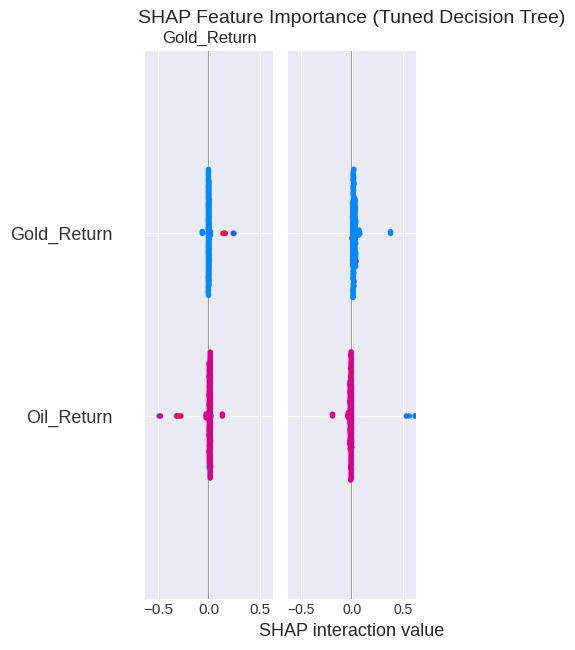

<Figure size 1400x800 with 0 Axes>

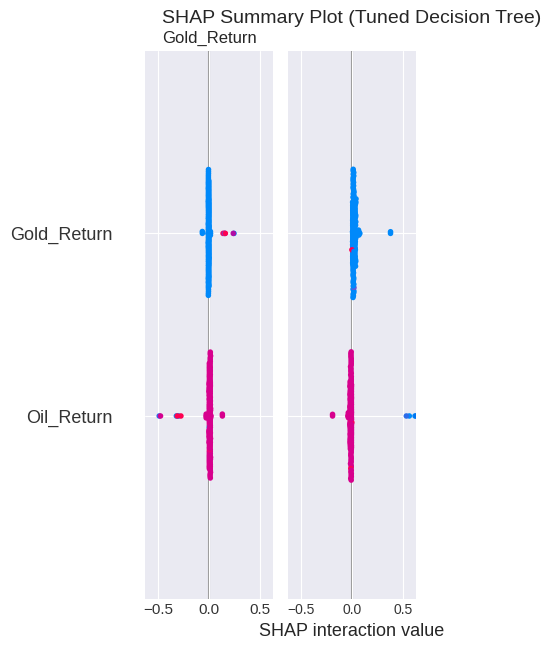

SHAP plots


In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(tuned_decision_tree_model)
shap_values = explainer.shap_values(X_test)

print("Generating SHAP summary plot...")

plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Tuned Decision Tree)", fontsize=14, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot (Tuned Decision Tree)", fontsize=14, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("SHAP plots")


Generating SHAP summary plot...


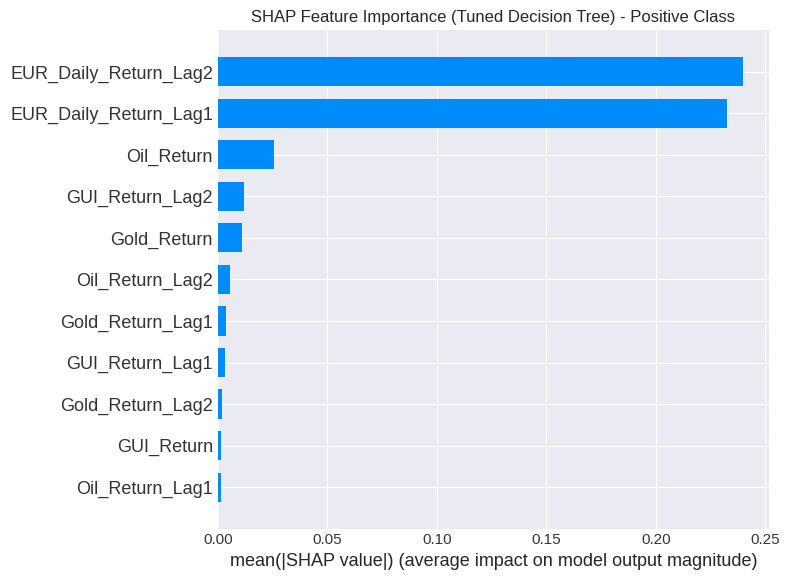

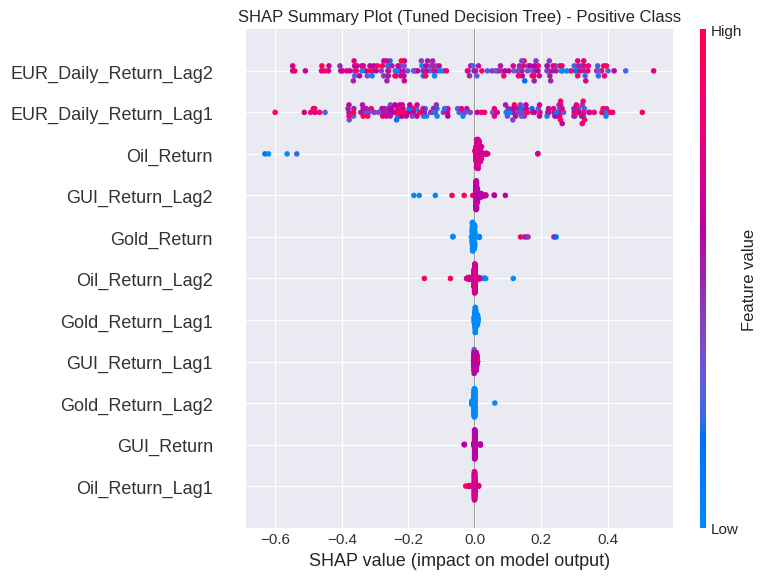

SHAP analysis completed.


In [ ]:
import shap
import matplotlib.pyplot as plt

# Ensure shap is installed
!pip install shap -qqq

# Create a SHAP explainer for the tuned Decision Tree model
# shap.TreeExplainer is suitable for tree-based models
explainer = shap.TreeExplainer(tuned_decision_tree_model)


shap_values = explainer.shap_values(X_test)

# Ensure shap_values_for_plot is correctly shaped for summary_plot
if isinstance(shap_values, list):
    # This is the standard behavior for TreeExplainer on binary classification
    shap_values_for_plot = shap_values[1] # SHAP values for the positive class
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    # This handles the case where it returns a 3D array (n_samples, n_features, n_classes)
    shap_values_for_plot = shap_values[:, :, 1] # SHAP values for the positive class
else:
    # If it's a 2D array, assume it's already for the single output or primary class
    shap_values_for_plot = shap_values

# Visualize the SHAP values (summary plot)
print("Generating SHAP summary plot...")
plt.figure(figsize=(10, 8))
# Use the correctly sliced shap_values_for_plot
shap.summary_plot(shap_values_for_plot, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Tuned Decision Tree) - Positive Class")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_for_plot, X_test, show=False)
plt.title("SHAP Summary Plot (Tuned Decision Tree) - Positive Class")
plt.tight_layout()
plt.show()

print("SHAP analysis completed.")

In [ ]:
# Install LIME
!pip install lime -qqq

import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the tuned_decision_tree_model and X_test are available
# (Assuming previous cells successfully defined them)

# Create a LIME explainer
# feature_names should match the columns of X_test
# class_names are the target classes (0 and 1 for binary classification)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, # Use training data for statistics
    feature_names=X_train.columns.tolist(),
    class_names=['Down', 'Up'], # Assuming 0 is 'Down' and 1 is 'Up'
    mode='classification'
)

# Select an instance from the test set to explain
# For demonstration, let's pick the first instance in X_test
# You can change `idx_to_explain` to explain other instances
idx_to_explain = 0
instance_to_explain = X_test.iloc[idx_to_explain].values
true_label = y_test.iloc[idx_to_explain]
predicted_label = tuned_decision_tree_model.predict(instance_to_explain.reshape(1, -1))[0]

print(f"Explaining instance {idx_to_explain} from X_test.")
print(f"True label: {'Up' if true_label == 1 else 'Down'}")
print(f"Predicted label: {'Up' if predicted_label == 1 else 'Down'}")

# Generate explanation for the chosen instance
# num_features controls how many features are shown in the explanation
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=tuned_decision_tree_model.predict_proba,
    num_features=5 # Show top 5 contributing features
)

# Visualize the explanation
print("\nLIME Explanation for individual prediction:")
explanation.show_in_notebook(show_all=False)

# Optionally, get features and weights for custom plotting
# exp_list = explanation.as_list()
# print("\nLIME Features and Weights:", exp_list)

print("LIME explanation generation completed. Look for the interactive plot above.")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Explaining instance 0 from X_test.
True label: Down
Predicted label: Up

LIME Explanation for individual prediction:


LIME explanation generation completed. Look for the interactive plot above.


In [ ]:
import pandas as pd
import numpy as np

# Calculate mean absolute SHAP values for each feature
# shap_values_for_plot has shape (n_samples, n_features)
mean_abs_shap_values = np.abs(shap_values_for_plot).mean(axis=0)

# Create a DataFrame to store feature names and their mean absolute SHAP values
feature_importance_shap = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_Abs_SHAP': mean_abs_shap_values
})

# Sort the features by their mean absolute SHAP value in descending order
feature_importance_shap = feature_importance_shap.sort_values(by='Mean_Abs_SHAP', ascending=False)

print("Top 5 Features by Mean Absolute SHAP Value:")
display(feature_importance_shap.head(5))

Top 5 Features by Mean Absolute SHAP Value:


,Feature,Mean_Abs_SHAP
4,EUR_Daily_Return_Lag2,0.239845
3,EUR_Daily_Return_Lag1,0.232514
0,Oil_Return,0.025529
10,GUI_Return_Lag2,0.011863
1,Gold_Return,0.010867
